#Εργασία 5

Ον/νο: Μαρία Καρλάκη ΑΕΜ: 244

Φόρτωση του dataset και των βιλιοθηκών

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

Ερώτημα 1

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Ερώτημα 2

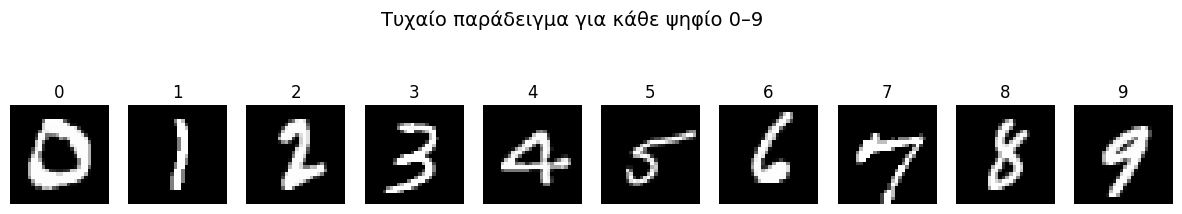

In [5]:
plt.figure(figsize=(15, 3))

for digit in range(10):
    indices = np.where(y_train == digit)[0]
    random_index = np.random.choice(indices)
    plt.subplot(1, 10, digit + 1)
    plt.imshow(x_train[random_index], cmap='gray')
    plt.title(str(digit))
    plt.axis('off')
plt.suptitle("Τυχαίο παράδειγμα για κάθε ψηφίο 0–9", fontsize=14)
plt.show()

Ερώτημα 3

In [6]:
print("Μέγεθος κάθε εικόνας:", x_train[0].shape)
print("Συνολικός αριθμός pixels:", x_train[0].size)

Μέγεθος κάθε εικόνας: (28, 28)
Συνολικός αριθμός pixels: 784


Κάθε εικόνα έχει μέγεθος 28×28 pixels (784 συνολικά). Τα περισσότερα είναι μαύρα γιατί αντιπροσωπεύουν το φόντο και δεν είναι σημαντικά. Σημαντικά είναι μόνο τα pixels που σχηματίζουν το ίδιο το ψηφίο, δηλαδή αυτά με μεγαλύτερες τιμές (λευκές ή γκρι περιοχές στην εικόνα).

Ερώτημα 4

In [12]:
x_train_new = x_train.reshape(x_train.shape[0], -1)
x_test_new = x_test.reshape(x_test.shape[0], -1)

print("Νέο σχήμα x_train_flat:", x_train_new.shape)
print("Νέο σχήμα x_test_flat:", x_test_new.shape)

Νέο σχήμα x_train_flat: (60000, 784)
Νέο σχήμα x_test_flat: (10000, 784)


Ερώτημα 5

Εκπαίδευση KNN με k=5...
Εκπαίδευση KNN με k=15...
Εκπαίδευση KNN με k=51...
Εκπαίδευση KNN με k=244...

Αποτελέσματα:
k=5 -> Train accuracy=0.9819, Test accuracy=0.9688
k=15 -> Train accuracy=0.9710, Test accuracy=0.9633
k=51 -> Train accuracy=0.9532, Test accuracy=0.9533
k=244 -> Train accuracy=0.9211, Test accuracy=0.9241


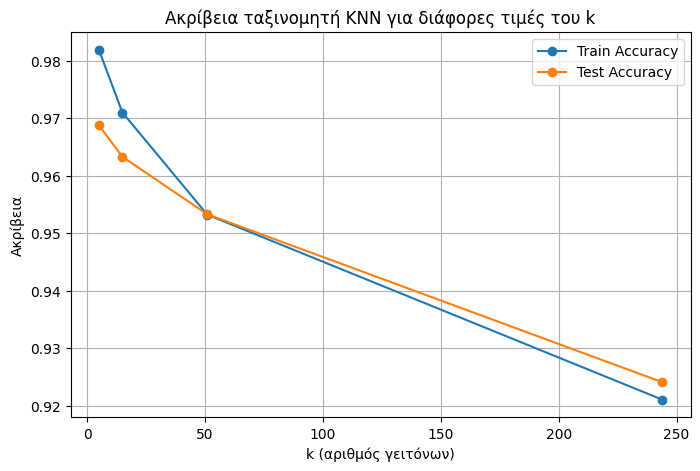

In [16]:
N = x_train_new.shape[0]
k_values = [5, 15, 51, int(np.sqrt(N))]

train_accuracies = []
test_accuracies = []

for k in k_values:
    print(f"Εκπαίδευση KNN με k={k}...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_new, y_train)

    y_pred_train = knn.predict(x_train_new)
    y_pred_test = knn.predict(x_test_new)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
print("\nΑποτελέσματα:")
for i, k in enumerate(k_values):
    print(f"k={k} -> Train accuracy={train_accuracies[i]:.4f}, Test accuracy={test_accuracies[i]:.4f}")

plt.figure(figsize=(8,5))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('k (αριθμός γειτόνων)')
plt.ylabel('Ακρίβεια')
plt.title('Ακρίβεια ταξινομητή KNN για διάφορες τιμές του k')
plt.legend()
plt.grid(True)
plt.show()

Ερώτημα 6

Εκπαίδευση KNN με k=5 (με κανονικοποίηση)...
Εκπαίδευση KNN με k=15 (με κανονικοποίηση)...
Εκπαίδευση KNN με k=51 (με κανονικοποίηση)...
Εκπαίδευση KNN με k=244 (με κανονικοποίηση)...

Αποτελέσματα με κανονικοποίηση:
k=5 -> Train accuracy=0.9819, Test accuracy=0.9688
k=15 -> Train accuracy=0.9710, Test accuracy=0.9633
k=51 -> Train accuracy=0.9532, Test accuracy=0.9533
k=244 -> Train accuracy=0.9211, Test accuracy=0.9241


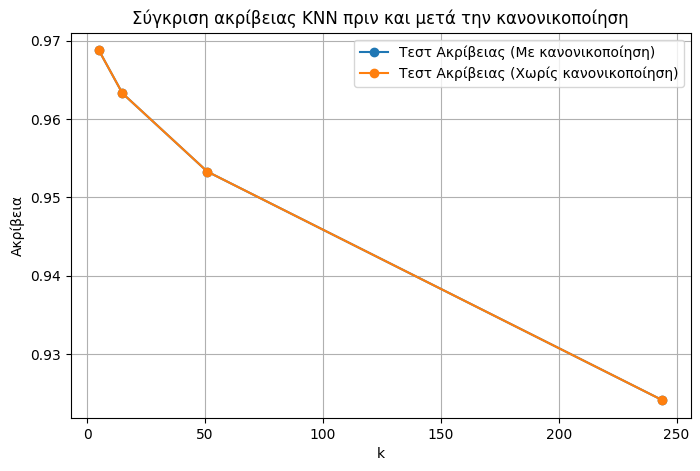

In [19]:
x_train_scaled = x_train_new / 255.0
x_test_scaled = x_test_new / 255.0

N = x_train_scaled.shape[0]
k_values = [5, 15, 51, int(np.sqrt(N))]

train_accuracies_scaled = []
test_accuracies_scaled = []

for k in k_values:
    print(f"Εκπαίδευση KNN με k={k} (με κανονικοποίηση)...")
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train_scaled, y_train)

    y_pred_train = knn.predict(x_train_scaled)
    y_pred_test = knn.predict(x_test_scaled)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    train_accuracies_scaled.append(train_acc)
    test_accuracies_scaled.append(test_acc)

print("\nΑποτελέσματα με κανονικοποίηση:")
for i, k in enumerate(k_values):
    print(f"k={k} -> Train accuracy={train_accuracies_scaled[i]:.4f}, Test accuracy={test_accuracies_scaled[i]:.4f}")

plt.figure(figsize=(8,5))
plt.plot(k_values, test_accuracies_scaled, marker='o', label='Τεστ Ακρίβειας (Με κανονικοποίηση)')
plt.plot(k_values, test_accuracies, marker='o', label='Τεστ Ακρίβειας (Χωρίς κανονικοποίηση)')
plt.xlabel('k')
plt.ylabel('Ακρίβεια')
plt.title('Σύγκριση ακρίβειας KNN πριν και μετά την κανονικοποίηση')
plt.legend()
plt.grid(True)
plt.show()

Ερώτημα 7

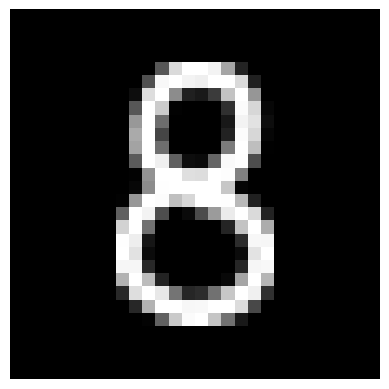

Το μοντέλο προβλέπει: 8


In [30]:
def preprocess_to_mnist(path):
    img = Image.open(path).convert('L')
    arr = np.array(img, dtype=np.float32) / 255.0
    mask = arr > 0.1
    ys, xs = np.where(mask)
    y0, y1 = ys.min(), ys.max() + 1
    x0, x1 = xs.min(), xs.max() + 1
    crop = arr[y0:y1, x0:x1]
    h, w = crop.shape
    if h >= w:
        new_h, new_w = 20, int(round(w * 20 / h))
    else:
        new_w, new_h = 20, int(round(h * 20 / w))
    crop_img = Image.fromarray((crop * 255).astype(np.uint8)).resize((new_w, new_h))
    crop = np.array(crop_img, dtype=np.float32) / 255.0
    canvas = np.zeros((28, 28), dtype=np.float32)
    y_start = (28 - new_h) // 2
    x_start = (28 - new_w) // 2
    canvas[y_start:y_start+new_h, x_start:x_start+new_w] = crop
    return canvas

img28 = preprocess_to_mnist("Number.png")
plt.imshow(img28, cmap='gray')
plt.axis('off')
plt.show()

img_vec = img28.reshape(1, -1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)
pred = knn.predict(img_vec)[0]
print("Το μοντέλο προβλέπει:", pred)